In [45]:
%matplotlib inline

In [144]:
import numpy as np
import pandas  as pd
import pickle
import os
import matplotlib.pyplot as plt
import requests
from bs4 import BeautifulSoup

In [11]:
os.listdir('../')

['Test_TransE.cpp',
 'log.txt',
 'Test_TransE',
 'fb_parse.py',
 'Train_TransE',
 'Train_TransE.cpp',
 'convert.py',
 'notfound',
 'multi_thread_Train_TransE',
 'parser',
 'multi_thread_Train_TransE.cpp',
 'relation2vec.bern',
 'makefile',
 'entity2vec.bern',
 'Train_TransE.py',
 'Test.cpp']

In [2]:
vec_path = '../'

In [15]:
# with open(vec_path+'entity2vec.bern', 'rb') as f:
#     data = pickle.load(f,encoding='iso-8859-1')

In [17]:
os.listdir("../../../FB15k")

['relation2id.txt',
 'valid.txt',
 'f2w.nt',
 '.DS_Store',
 'test.txt',
 'entity2id.txt',
 'train.txt']

In [18]:
data_path = '../../../FB15k/'

In [141]:
fb2wiki = {}
with open(data_path+'f2w.nt','r') as f:
    data = f.readlines()
    for i in data:
        fb, wiki = i.split(' ')
        fb2wiki[fb] = wiki.rstrip()

In [148]:
def get_target_name(fb_id):
    try:
        res = requests.get("https://www.wikidata.org/wiki/"+fb2wiki[fb_id])
        res.encoding = 'utf-8'
        soup = BeautifulSoup(res.text, "html.parser")
        for tag in soup.find_all('span', class_='wikibase-title-label'):
            return tag.string
    except:
        return fb_id

In [162]:
with open(data_path+'train.txt', 'r') as f:
    data = f.readlines()

In [163]:
data[0]

'/m/027rn\t/m/06cx9\t/location/country/form_of_government\n'

In [164]:
relation_map_h = {}
relation_map_t = {}
for i in data:
    head, tail, rel = i.split('\t')
    if rel in relation_map_h and head in relation_map_h[rel]:
        if tail in relation_map_h[rel][head]:
            print(head, tail, rel)
        relation_map_h[rel][head] += [tail]
    elif rel in relation_map_h:
        relation_map_h[rel].update({head:[tail]})
    else:
        relation_map_h[rel] = {head:[tail]}
    
    if rel in relation_map_t and tail in relation_map_t[rel]:
        if head in relation_map_t[rel][tail]:
            print(head, tail, rel)
        relation_map_t[rel][tail] += [head]
    elif rel in relation_map_t:
        relation_map_t[rel].update({tail:[head]})
    else:
        relation_map_t[rel] = {tail:[head]}

In [165]:
relation_head_cnt = {}
for key, values in relation_map_h.items():
    cnt = 0
    for _, tails in values.items():
        cnt += len(tails)
    relation_head_cnt[key] = cnt

# FB relation analysis

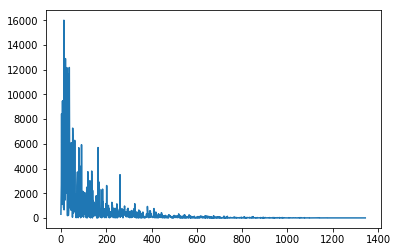

In [166]:
plt.plot(relation_head_cnt.values())

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10], <a list of 11 Text xticklabel objects>)

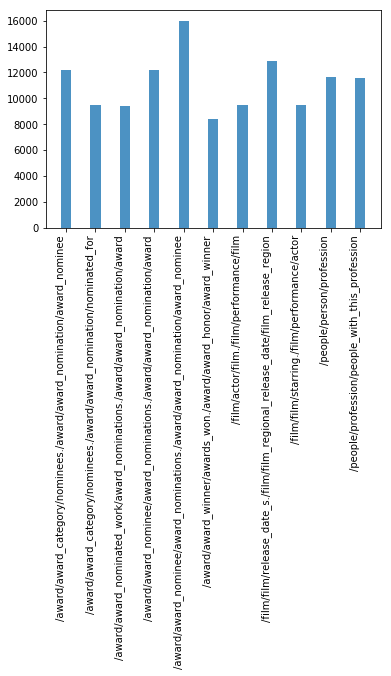

In [174]:
relation_head_most_cnt = {}
for key, values in relation_map_h.items():
    cnt = 0
    for _, tails in values.items():
        cnt += len(tails)
    if cnt > 8000:
        relation_head_most_cnt[key] = cnt

plt.bar(relation_head_most_cnt.keys(), relation_head_most_cnt.values(), width = 0.35, align='center', alpha=0.8)
plt.xticks(rotation=90)

In [168]:
relation_tail_cnt = {}
for key, values in relation_map_t.items():
    cnt = 0
    for _, heads in values.items():
        cnt += len(heads)
    relation_tail_cnt[key] = cnt

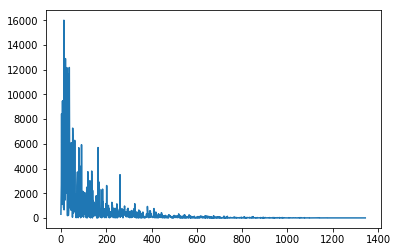

In [169]:
plt.plot(relation_tail_cnt.values())

([0, 1, 2, 3, 4, 5], <a list of 6 Text xticklabel objects>)

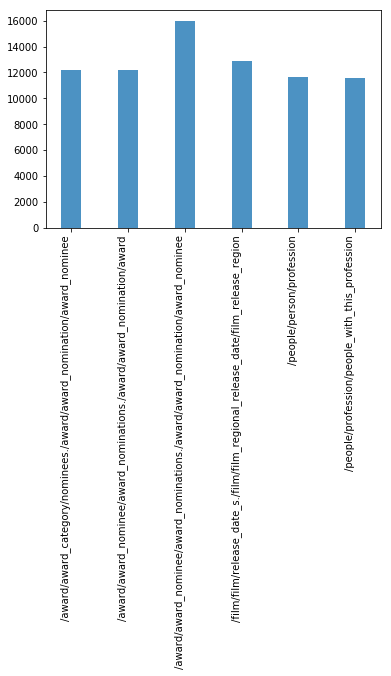

In [171]:
relation_tail_most_cnt = {}
for key, values in relation_map_t.items():
    cnt = 0
    for _, head in values.items():
        cnt += len(head)
    if cnt > 10000:
        relation_tail_most_cnt[key] = cnt

plt.bar(relation_tail_most_cnt.keys(), relation_tail_most_cnt.values(), width = 0.35, align='center', alpha=0.8)
plt.xticks(rotation=90)

# FB entity analysis

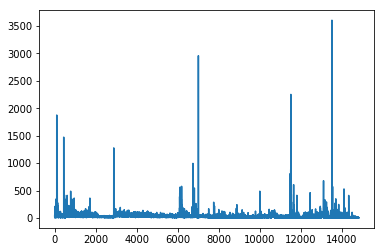

In [175]:
entity_h_cnt = {}
for key, values in relation_map_h.items():
    for head, tails in values.items():
#         if head in entity_h_cnt and key in entity_h_cnt[head]:
#             entity_h_cnt[head][key] += 1
#         else:
#             entity_h_cnt[head] = {key:1}
        if head in entity_h_cnt:
            entity_h_cnt[head] += len(tails)
        else:
            entity_h_cnt[head] = len(tails)

plt.plot(entity_h_cnt.values())

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17],
 <a list of 18 Text xticklabel objects>)

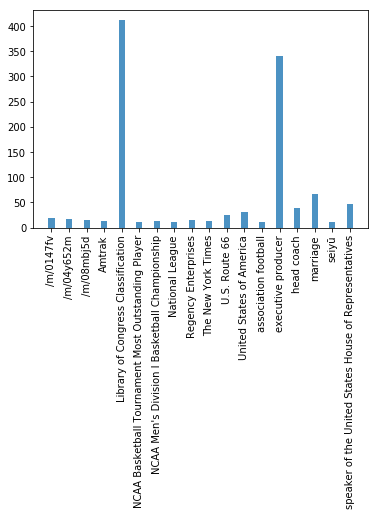

In [158]:
entity_h_most_cnt = {}
for key, value in entity_h_cnt.items():
    if value > 10:
        entity_h_most_cnt[key] = value

list_key = []
for key in entity_h_most_cnt.keys():
    list_key += [get_target_name(key)]

plt.bar(list_key, entity_h_most_cnt.values(), width = 0.35, align='center', alpha=0.8)
plt.xticks(rotation=90)

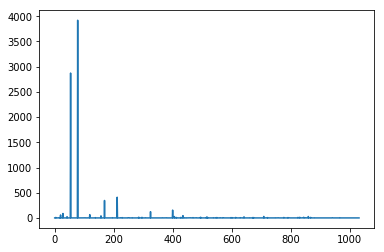

In [128]:
entity_t_cnt = {}
for key, values in relation_map_t.items():
    for tail, heads in values.items():
#         if head in entity_h_cnt and key in entity_h_cnt[head]:
#             entity_h_cnt[head][key] += 1
#         else:
#             entity_h_cnt[head] = {key:1}
        if tail in entity_t_cnt:
            entity_t_cnt[tail] += len(heads)
        else:
            entity_t_cnt[tail] = len(heads)

plt.plot(entity_t_cnt.values())

([0, 1, 2, 3, 4, 5, 6, 7, 8], <a list of 9 Text xticklabel objects>)

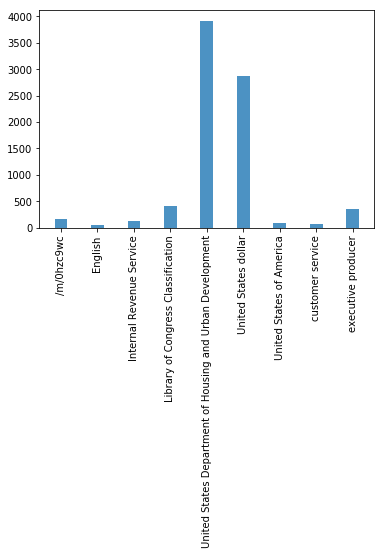

In [160]:
entity_t_most_cnt = {}
for key, value in entity_t_cnt.items():
    if value > 50:
        entity_t_most_cnt[key] = value

list_key = []
for key in entity_t_most_cnt.keys():
    list_key += [get_target_name(key)]

plt.bar(list_key, entity_t_most_cnt.values(), width = 0.35, align='center', alpha=0.8)
plt.xticks(rotation=90)

# prediction cluster analysis